### Covid Classification of Kaggle dataset for Covid
## link to covid dataset https://www.kaggle.com/datasets/meirnizri/covid19-dataset

# Main field is Called Classification Final
# Definition of that result classification Final
# classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
# degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.



In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import seaborn

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

## Import data: Data set is limited to 5000 rows due to size of overall set
## The smaller dataset size insures that the code will run, when run at the full data size
## the different models take way to long to return a result.

In [3]:
# Load Dataset
import warnings
warnings.filterwarnings("ignore"
                       ) 
path = "Covid_Data.csv"
data1 = pandas.read_csv(path,nrows = 5000)

## Perform Exploratory Data Analysis

# Data review Consisted of 
1) check basic structure and values in each data field
2) check for missing values
3) remove uneeded data fields
4) check to see if Scaling the data is needed
5) Determine the best fields for predicting the Covid Classification



In [4]:
# Shape
print(data1.shape)

(5000, 21)


In [5]:
# Head
print(data1.head(20))

    USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0       2             1    1             1  03/05/2020       97          1   
1       2             1    2             1  03/06/2020       97          1   
2       2             1    2             2  09/06/2020        1          2   
3       2             1    1             1  12/06/2020       97          2   
4       2             1    2             1  21/06/2020       97          2   
5       2             1    1             2  9999-99-99        2          1   
6       2             1    1             1  9999-99-99       97          2   
7       2             1    1             1  9999-99-99       97          1   
8       2             1    1             2  9999-99-99        2          2   
9       2             1    1             2  9999-99-99        2          2   
10      2             1    1             1  9999-99-99       97          2   
11      2             1    2             2  9999-99-99        2 

### Get a look at each columns basic analytical information to understand range of data and if any modification is needed such
### as scaling the values

In [6]:
# descriptions
pandas.set_option('display.float_format', lambda x: '%.2f' % x)
print(data1.describe())

        USMER  MEDICAL_UNIT     SEX  PATIENT_TYPE  INTUBED  PNEUMONIA     AGE  \
count 5000.00       5000.00 5000.00       5000.00  5000.00    5000.00 5000.00   
mean     1.45          2.91    1.53          1.47    54.17       1.95   48.69   
std      0.50          0.38    0.50          0.50    47.44       6.17   17.61   
min      1.00          1.00    1.00          1.00     1.00       1.00    0.00   
25%      1.00          3.00    1.00          1.00     2.00       1.00   36.00   
50%      1.00          3.00    2.00          1.00    97.00       2.00   48.00   
75%      2.00          3.00    2.00          2.00    97.00       2.00   60.25   
max      2.00          3.00    2.00          2.00    99.00      99.00  103.00   

       PREGNANT  DIABETES    COPD  ASTHMA  INMSUPR  HIPERTENSION  \
count   5000.00   5000.00 5000.00 5000.00  5000.00       5000.00   
mean      52.52      2.13    2.31    2.32     2.37          2.09   
std       47.41      5.78    5.59    5.75     6.06          5.78  

## Look a distribution of current  Covid classification distribution shows a large clustering at 3 for a result

CLASIFFICATION_FINAL
1     112
2      24
3    4261
4      35
5      78
6      60
7     430
dtype: int64


<AxesSubplot: >

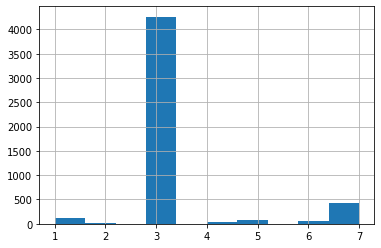

In [7]:
# class distribution
print(data1.groupby('CLASIFFICATION_FINAL').size())
data1.CLASIFFICATION_FINAL.hist()

## Review each data column for pattern differences. 
## Looking at the histograms belows you can see that the data is not all on the same scale

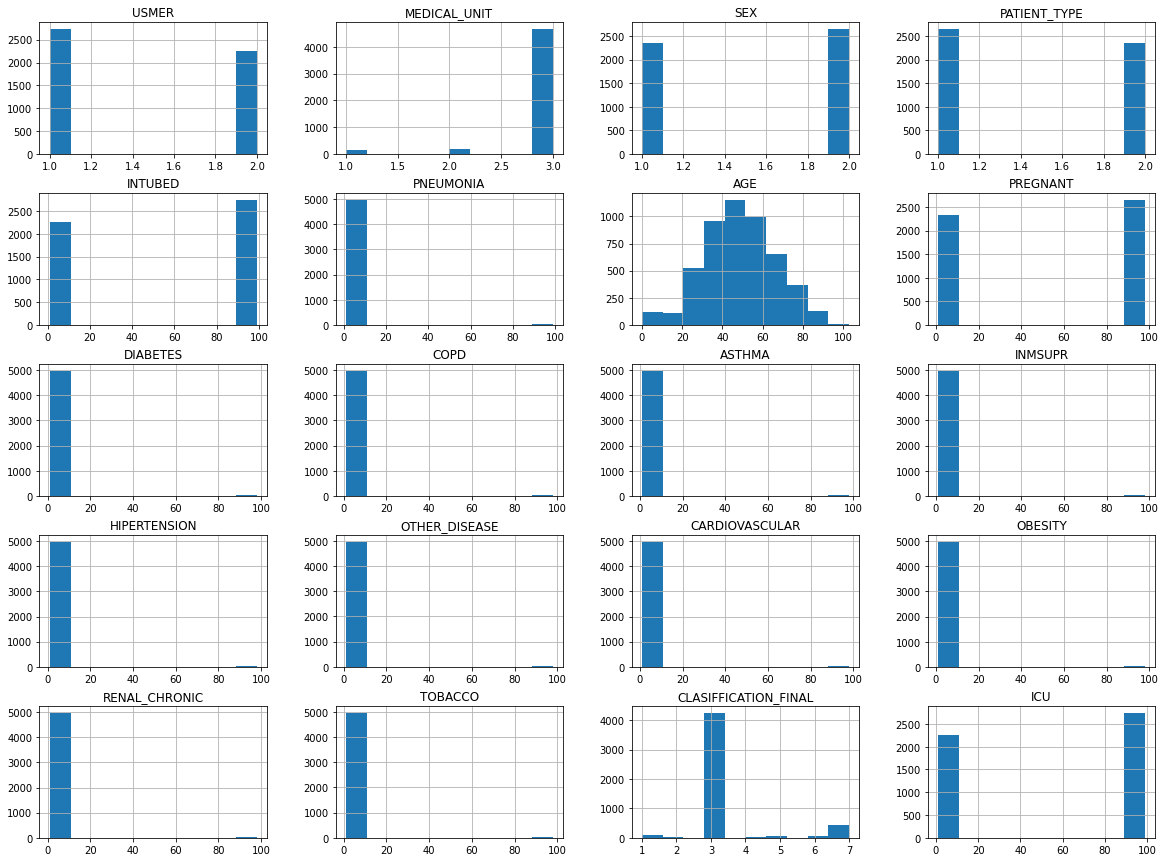

In [8]:
# histograms
plt.rcParams["figure.figsize"] = (20,15)
data1.hist()
plt.show()

## Look at how well the data is correlated to each other for possible hints at which fields might work best 
## One problem was noticeable in that certain fields while highly correlated do not make them a good candidate
## ICU for instance, highly probable that they do have COVID but not a good indicator as to why they are high risk

<AxesSubplot: >

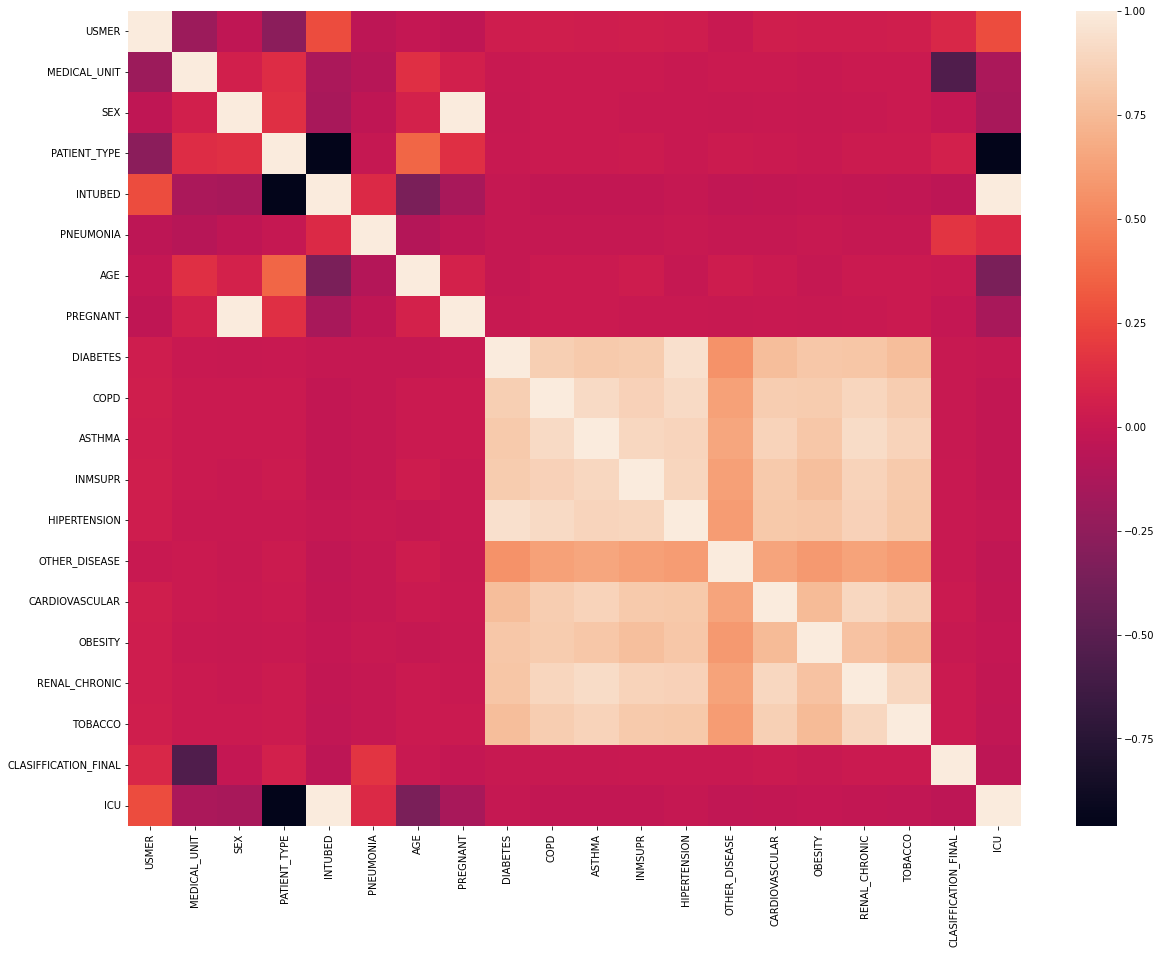

In [9]:
# scatter plot matrix
#print(data1.corr())
data1.corr(method ='pearson')['CLASIFFICATION_FINAL']
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data1.corr())



## Setup Training data, filter dataset for Rows with missing values and drop unecessary fields for X Train Data
## Missing data is indicated by values that 97,98 or 99 per the kaggle website documentation



In [10]:
#Columns_to_Drop = ['SEX','PATIENT_TYPE','AGE','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']
#test=data1.drop(Columns_to_Drop,axis=1)
#test
#Check_missing_Data = ['SEX','PATIENT_TYPE','AGE','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']
#for field1 in Check_missing_Data:
#    print(field1)


In [11]:
# Split-out validation dataset
array = data1.values

#drop columns with negative correlation
Check_missing_Data = ['SEX','PATIENT_TYPE','AGE','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']


#drop rows with Missing data
for field1 in Check_missing_Data:
    data1[(data1[field1] != 97) | (data1[field1] != 98) | (data1[field1] != 99)]

#Set Y data
y = data1['CLASIFFICATION_FINAL']

#drop columns not needed
Columns_to_Drop = ['CLASIFFICATION_FINAL','DATE_DIED','AGE','MEDICAL_UNIT','INTUBED','PREGNANT','ICU']
X = data1.drop(Columns_to_Drop, axis=1)

print(X.head())

validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size = validation_size, random_state = seed)

# Scalling was not needed on this final set, but if it was then I would have implmented this step
#sc=StandardScaler()
#x_train_scaled=sc.fit_transform(X_train)
#x_test_scaled=sc.transform(X_test)
#x_train_scaled

   USMER  SEX  PATIENT_TYPE  PNEUMONIA  DIABETES  COPD  ASTHMA  INMSUPR  \
0      2    1             1          1         2     2       2        2   
1      2    2             1          1         2     2       2        2   
2      2    2             2          2         1     2       2        2   
3      2    1             1          2         2     2       2        2   
4      2    2             1          2         1     2       2        2   

   HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
0             1              2               2        2              2   
1             1              2               2        1              1   
2             2              2               2        2              2   
3             2              2               2        2              2   
4             1              2               2        2              2   

   TOBACCO  
0        2  
1        2  
2        2  
3        2  
4        2  


## Cross Validation to check different models for accuracy

This will split our dataset into 2 parts, train on 1 and test on 1 and repeat for all combinations of train-test splits

In [12]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

Check several types of Models for which might be a better choice for this dataset

* Logistic Regression (LR)
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)

In [13]:
models = []
models.append(('LR', LogisticRegression(max_iter=100)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=2, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.850750 (0.003250)
KNN: 0.846250 (0.001750)
SVM: 0.851750 (0.003250)



# Run Predictions to compare True to predicted y values across all selected models

In [14]:
# predict values using test set

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

LR
0.864
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         7
           3       0.87      1.00      0.93       863
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        13
           7       0.80      0.05      0.10        78

    accuracy                           0.86      1000
   macro avg       0.24      0.15      0.15      1000
weighted avg       0.81      0.86      0.81      1000

KNN
0.864
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         7
           3       0.87      1.00      0.93       863
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        13
     

## Looks like the SVM performs best on this set at predicting if somebody is a high risk for COVID